<img src="images/Peoplelogy-Logo.png" style="height: 100px;" align=left> <img src="images/sklearn-logo.png" style="height: 100px;" align=right>

# Clustering Project 2: Credit Card Customer Segmentation


---

<img src="images/card.jpeg" style="height: 500px; width: 1500px;" align=left>
<br>

---

## Objective
Group credit card customers based on their spending patterns to help financial institutions personalize offers and services.

---

## Dataset
### Columns:
1. **CUST_ID**: Identification of Credit Card holder (Categorical).
2. **BALANCE**: Balance amount left in their account to make purchases.
3. **BALANCE_FREQUENCY**: How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
4. **PURCHASES**: Amount of purchases made from the account.
5. **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go.
6. **INSTALLMENTS_PURCHASES**: Amount of purchase done in installments.
7. **CASH_ADVANCE**: Cash in advance given by the user.
8. **PURCHASES_FREQUENCY**: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
9. **ONEOFF_PURCHASES_FREQUENCY**: How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
11. **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance is being paid.
12. **CASH_ADVANCE_TRX**: Number of transactions made with "Cash in Advance."
13. **PURCHASES_TRX**: Number of purchase transactions made.
14. **CREDIT_LIMIT**: Limit of the Credit Card for the user.
15. **PAYMENTS**: Amount of payment done by the user.
16. **MINIMUM_PAYMENTS**: Minimum amount of payments made by the user.
17. **PRC_FULL_PAYMENT**: Percent of full payment paid by the user.
18. **TENURE**: Tenure of credit card service for the user.

---


In [42]:
# Tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Tasks

### 1. Data Exploration
- Load the dataset and display the first few rows.
- Identify relevant features for clustering.
- Visualize feature distributions (e.g., `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`).

---


In [4]:
df = pd.read_csv("data/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Detect the outlier

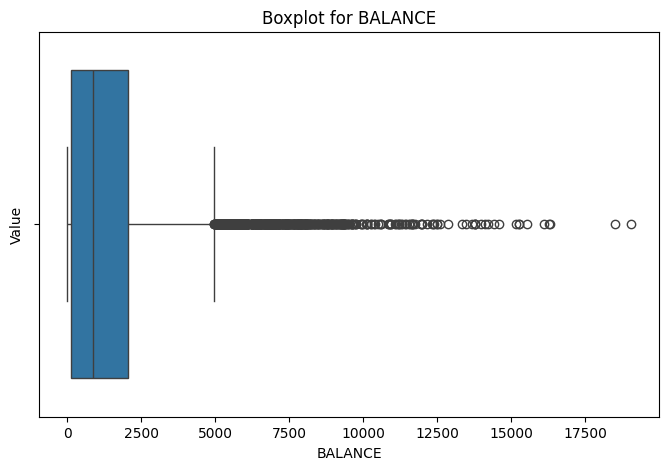

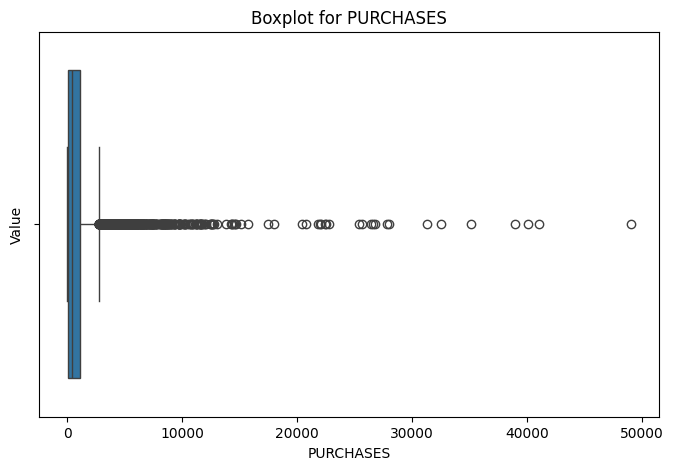

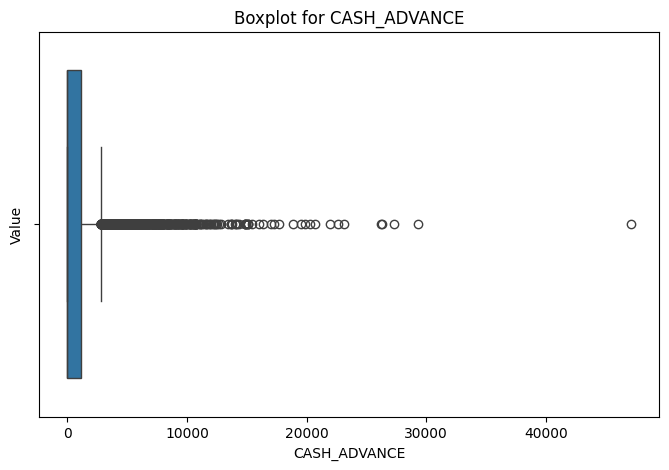

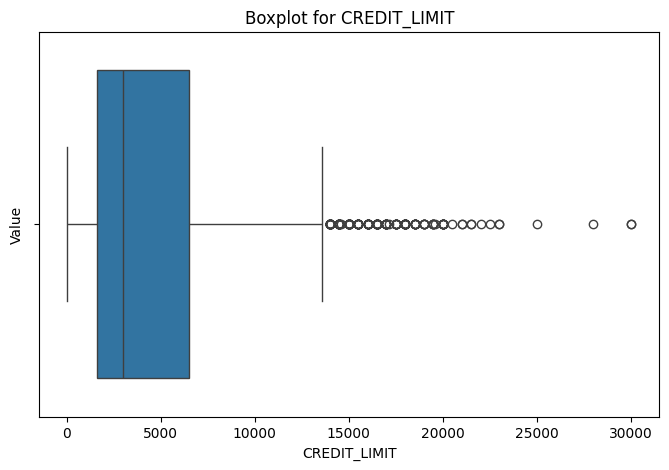

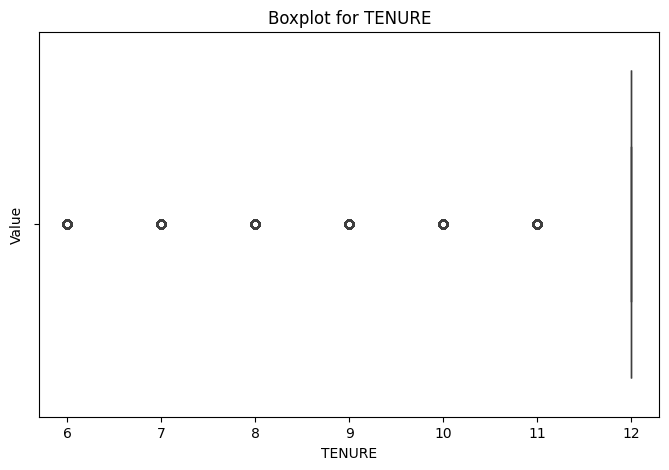

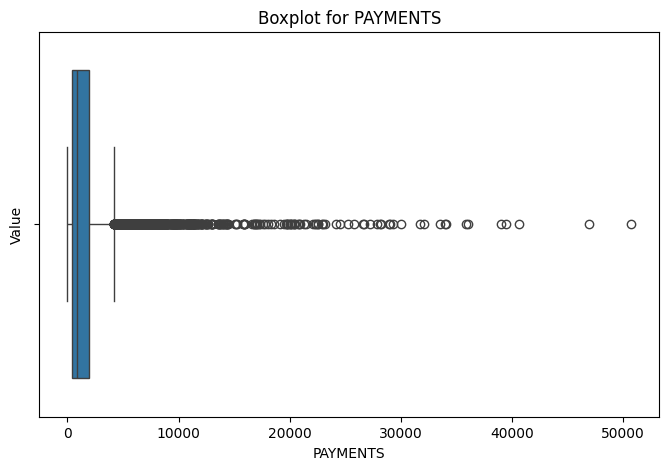

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to create boxplots
features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'TENURE', 'PAYMENTS']

# Loop through each feature to create a boxplot
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, data=creditcard)
    
    # Adding title and labels
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Value")
    
    # Show the plot
    plt.show()



### 2. Preprocessing
- Select features such as `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `TENURE`, and `PAYMENTS`.
- Handle missing values (e.g., fill with the mean or median).
- Standardize the features using `StandardScaler`.

---


In [40]:
creditcard = df.copy()
# Impute missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS
creditcard['CREDIT_LIMIT'] = creditcard['CREDIT_LIMIT'].fillna(creditcard['CREDIT_LIMIT'].median())
creditcard['MINIMUM_PAYMENTS'] = creditcard['MINIMUM_PAYMENTS'].fillna(creditcard['MINIMUM_PAYMENTS'].median())

creditcard.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [46]:
## Data dah clean so nk buat scalling

### 3. Clustering
#### **K-Means:**
1. Use the **Elbow Method** to determine the optimal number of clusters:
   - Plot the Within-Cluster-Sum of Squares (WCSS) for different \( K \) values and find the "elbow point."
2. Use the **Silhouette Method** to validate the number of clusters:
   - Compute the silhouette score for each value of \( K \) and plot the scores.
3. Apply K-Means clustering and visualize the clusters.


#### **DBSCAN:**
1. Apply DBSCAN clustering and visualize the clusters.
2. Experiment with different values of \( \varepsilon \) and `MinPts` to observe their effects.



#### **Davies-Bouldin Index:**
1. Calculate the Davies-Bouldin Index for the chosen clustering.
2. Compare which clustering approach (K-Means or DBSCAN) performs better based on the index.

---

### 4. Insights
- Analyze each cluster and identify characteristics (e.g., high spenders, frequent users).
- Suggest strategies for personalized marketing based on the clusters.

---